<a href="https://colab.research.google.com/github/bharath2787/ML-AI/blob/main/ANN/0_ANN_MNIST_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###ANN for MNIST DATASET

### Importing necessary libraries

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


### Import MNIST Dataset

In [ ]:


(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Perform EDA
*  Display basic information about the dataset

In [ ]:


print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {x_test.shape}')
print(f'Number of training samples: {len(x_train)}')
print(f'Number of testing samples: {len(x_test)}')


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Number of training samples: 60000
Number of testing samples: 10000


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

## how to print the image

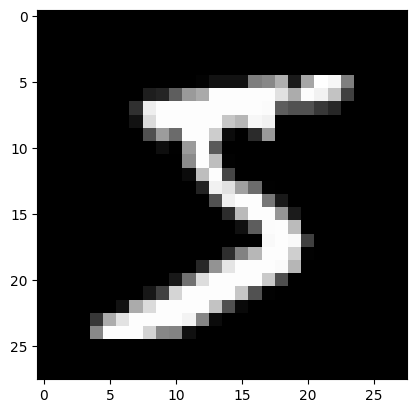

In [ ]:
    plt.imshow(x_train[0], cmap='gray')


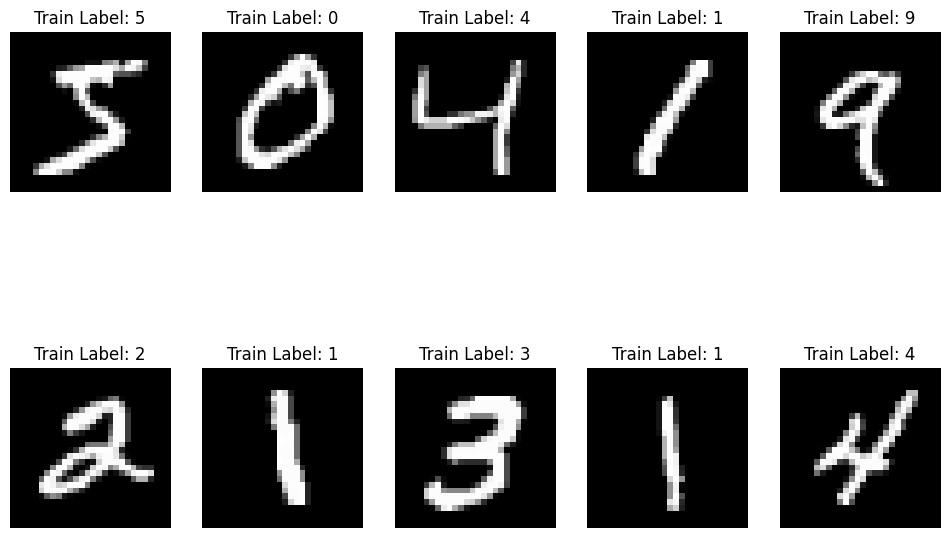

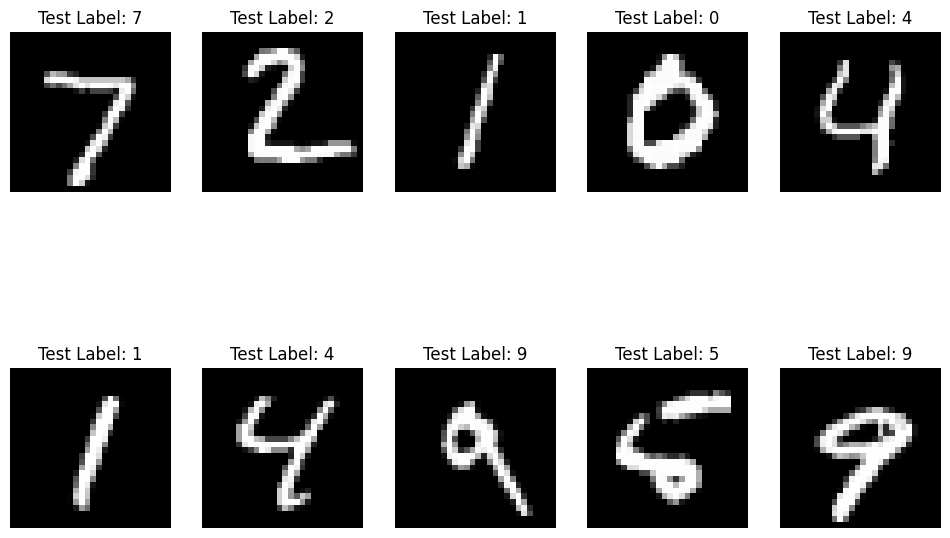

In [ ]:

#  Explain and show a sample from each of the sets (train, test, ytrain, ytest)
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Train Label: {y_train[i]}')
    plt.axis('off')
plt.show()

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Test Label: {y_test[i]}')
    plt.axis('off')
plt.show()


In [ ]:

# # 4. Show and explain class distribution in dataset in details
# plt.figure(figsize=(12, 12))
# sns.countplot(y_train)
# plt.title('Distribution of training labels')
# plt.xlabel('Digit')
# plt.ylabel('Count')
# plt.show()


In [ ]:

# plt.figure(figsize=(12, 6))
# sns.countplot(y_test)
# plt.title('Distribution of testing labels')
# plt.xlabel('Digit')
# plt.ylabel('Count')
# plt.show()


### Perform data preprocessing

In [ ]:


# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


### Transform labels and explain why it's necessary, also show and explain how labels looked before and after


In [ ]:

# Print first 10 labels before transformation
print("First 10 labels before transformation:", y_train[:10])


First 10 labels before transformation: [5 0 4 1 9 2 1 3 1 4]


### Convert class labels to one-hot encoded vectors


In [ ]:

# This transformation is necessary because the output layer of the neural network has 10 neurons (one for each class).
# The one-hot encoding transforms the labels into a binary matrix representation. This helps the model understand
# the correct class for each input and calculate the loss correctly during training.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


### Print first 10 labels after transformation


In [ ]:

print("First 10 labels after transformation:")
print(y_train[:10])


First 10 labels after transformation:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
28*28

784


### Build ANN model

In [ ]:

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D vector
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class) and softmax activation
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model with proper comments


In [ ]:

# optimizer='adam': Adam optimizer is chosen for its efficiency and adaptive learning rate.
# loss='categorical_crossentropy': Appropriate loss function for multi-class classification problems.
# metrics=['accuracy']: Accuracy is used as the metric to evaluate model performance.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Training the model




The `verbose` parameter controls **how much information** is displayed during the training process.

###  `verbose` values:

- `verbose=0`: **No output** (silent mode)
- `verbose=1`: **Progress bar** (default)
- `verbose=2`: **One line per epoch** (more concise)

---

###  in this case (`verbose=2`):
This means **each epoch will print a single line of output** like:

```
Epoch 1/50
loss: 0.6934 - accuracy: 0.51 - val_loss: 0.6929 - val_accuracy: 0.52
...
```


In [ ]:

history = model.fit(x_train, y_train, validation_split=0.2, epochs=26, batch_size=200, verbose=2)


Epoch 1/26
240/240 - 3s - 13ms/step - accuracy: 0.8800 - loss: 0.4307 - val_accuracy: 0.9431 - val_loss: 0.2001
Epoch 2/26
240/240 - 2s - 7ms/step - accuracy: 0.9503 - loss: 0.1706 - val_accuracy: 0.9609 - val_loss: 0.1376
Epoch 3/26
240/240 - 2s - 10ms/step - accuracy: 0.9656 - loss: 0.1205 - val_accuracy: 0.9638 - val_loss: 0.1233
Epoch 4/26
240/240 - 2s - 8ms/step - accuracy: 0.9728 - loss: 0.0931 - val_accuracy: 0.9657 - val_loss: 0.1111
Epoch 5/26
240/240 - 3s - 12ms/step - accuracy: 0.9781 - loss: 0.0753 - val_accuracy: 0.9695 - val_loss: 0.1021
Epoch 6/26
240/240 - 2s - 7ms/step - accuracy: 0.9821 - loss: 0.0611 - val_accuracy: 0.9697 - val_loss: 0.0961
Epoch 7/26
240/240 - 3s - 11ms/step - accuracy: 0.9847 - loss: 0.0514 - val_accuracy: 0.9720 - val_loss: 0.0994
Epoch 8/26
240/240 - 3s - 11ms/step - accuracy: 0.9881 - loss: 0.0416 - val_accuracy: 0.9736 - val_loss: 0.0915
Epoch 9/26
240/240 - 2s - 7ms/step - accuracy: 0.9889 - loss: 0.0363 - val_accuracy: 0.9749 - val_loss: 0.0

### Plotting the training and validation loss


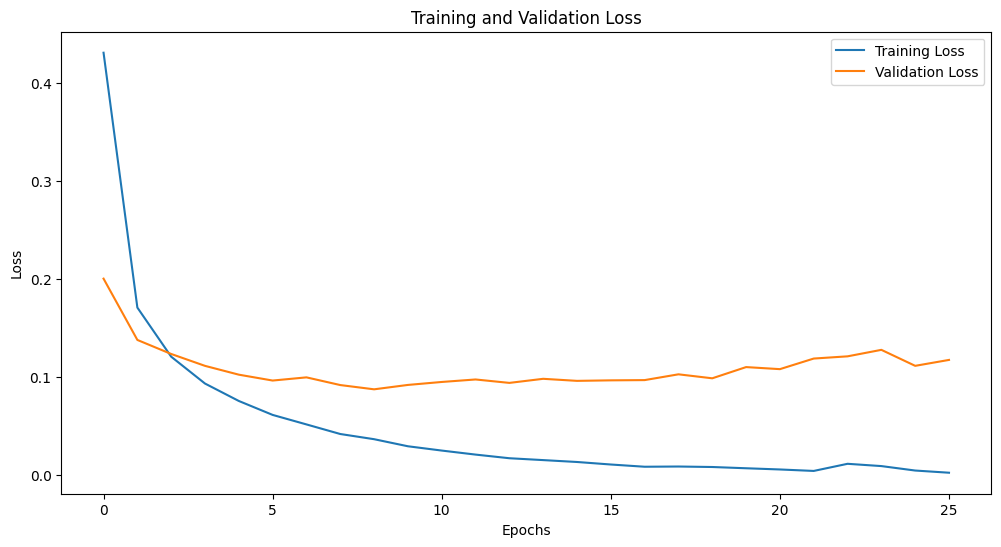

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## **To choose the best epoch from the training and validation loss curve:**

* Look for the epoch with lowest validation loss
In your plot:

* Training loss keeps decreasing.

* Validation loss decreases until around epoch 4 or 5, then it plateaus or slightly increases.

### **This suggests:**

* Epoch 4 or 5 is likely the best choice — after that, the model may start overfitting (training loss improves, but validation loss doesn't).

### Show various performance metrics


In [ ]:

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')


Test accuracy: 0.9793


# Making predictions


In [ ]:

y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### pick the class with highest probability

In [ ]:
np.argmax(y_pred[3])

np.int64(0)

## transform the actual and predicted to one dimensional before generating reports


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


In [ ]:
y_pred[0]

array([2.4837576e-11, 2.0153549e-12, 1.0092399e-10, 4.9016702e-08,
       7.8236512e-15, 6.9096774e-13, 1.5803491e-21, 9.9999958e-01,
       1.6611243e-09, 3.7442265e-07], dtype=float32)

### Printing classification report


In [ ]:

print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Plotting the confusion matrix


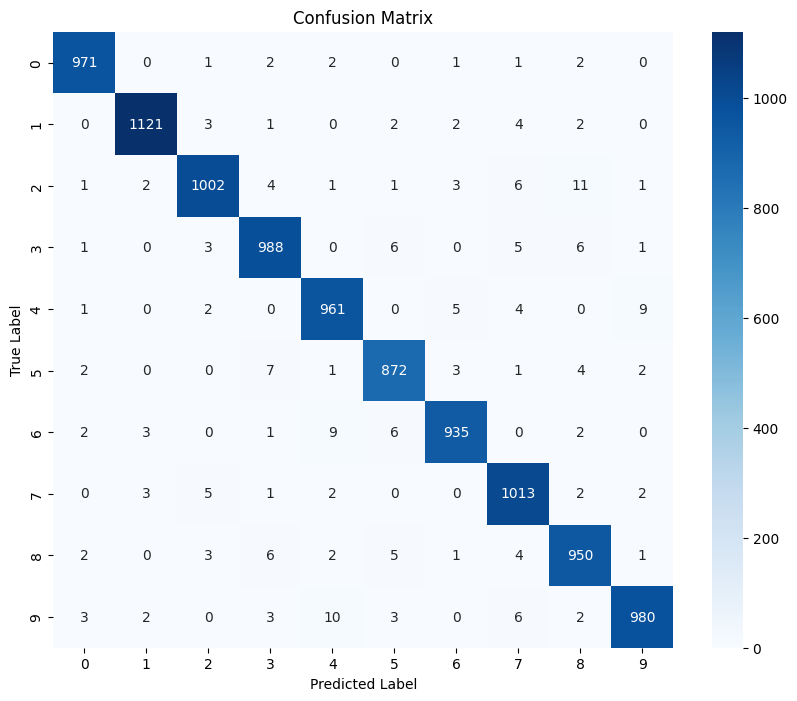

In [ ]:

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()




##Explain how to interpret precision, recall, f1-score and confusion matrix for this ANN model

- Precision: The ratio of correctly predicted positive observations to the total predicted positives. High precision means that
  more of the predicted positive values are correct.
- Recall: The ratio of correctly predicted positive observations to the all observations in actual class. High recall means that
  most of the actual positive values were identified.
- F1-Score: The weighted average of Precision and Recall. This score will take both false positives and false negatives into account.
- Confusion Matrix: A table used to describe the performance of a classification model. The matrix compares the actual target values
  with those predicted by the machine learning model. Each row of the matrix represents the instances in an actual class, while
  each column represents the instances in a predicted class.


### Make predictions once the model is ready


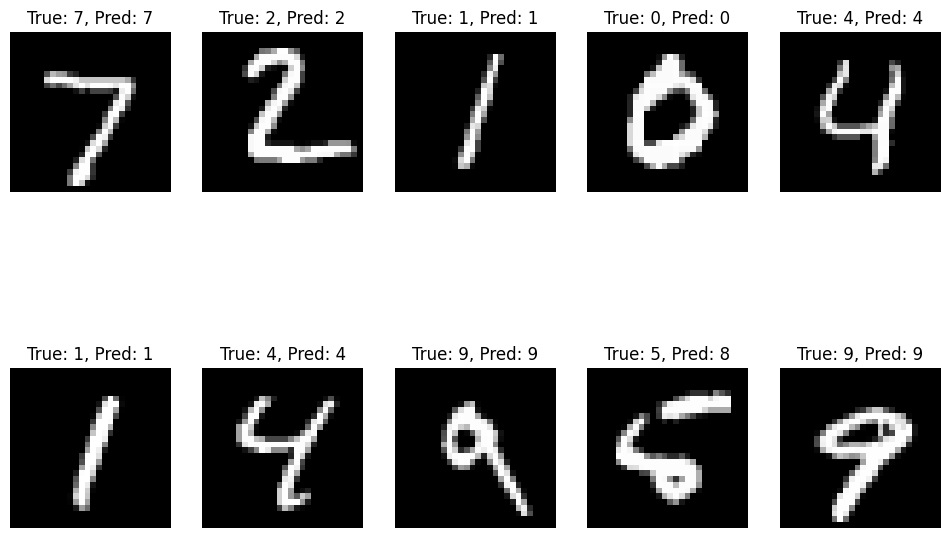

In [ ]:

# Example of predictions on the test set
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'True: {y_true_classes[i]}, Pred: {y_pred_classes[i]}')
    plt.axis('off')
plt.show()
